LOAD THE *DATA*

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
## Load the dataset
file_path = 'sample_data/student_depression_dataset.csv'
df=pd.read_csv('sample_data/student_depression_dataset.csv')
print (df.head()) #Display the first few rows

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

*** DATA CLEANING AND PREPROCESSING***
We'll check for:

Missing values

Unusual entries

Consistency in categories

In [ ]:
missing_values= df.isnull().sum() #checkimg missing values
data_types = df.dtypes #checking data types
# Get unique values in categorical columns
unique_values = {col:df[col].unique() for col in df.select_dtypes(include = 'object').columns}
missing_values,data_types,unique_values


(id                                       0
 Gender                                   0
 Age                                      0
 City                                     0
 Profession                               0
 Academic Pressure                        0
 Work Pressure                            0
 CGPA                                     0
 Study Satisfaction                       0
 Job Satisfaction                         0
 Sleep Duration                           0
 Dietary Habits                           0
 Degree                                   0
 Have you ever had suicidal thoughts ?    0
 Work/Study Hours                         0
 Financial Stress                         0
 Family History of Mental Illness         0
 Depression                               0
 dtype: int64,
 id                                         int64
 Gender                                    object
 Age                                      float64
 City                                      

** Step-by-Step Cleaning Plan
1. Convert Financial Stress
Replace '?' with NA

Drop rows with NA

2. Fix Sleep Duration
Remove unwanted quotes or leading/trailing spaces (already done earlier)

3. Clean City Column
Identify and remove obviously invalid entries like '3.0', 'M.Tech', 'ME', etc.

Keep only realistic city names**

In [ ]:
df['Financial Stress'] = pd.to_numeric (df['Financial Stress'].replace ('?', pd.NA)) # Convert 'Financial Stress' to numeric and drop rows with '?'
df = df.dropna (subset = ['Financial Stress'])
df['Sleep Duration'] = df['Sleep Duration'].astype(str).str.replace("'",'').str.strip() # Remove extra quotes from 'Sleep Duration'
# Remove invalid city names
invalid_cities = ['Vasai-Virar', 'Saanvi', 'M.Tech', 'Bhavna','Less Delhi', '3.0', 'Less than 5','Kalyan','Mira', 'Harsha', 'Vaanya','Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com','Nalyan', 'Mihir', 'Nalini', 'Nandini']
df = df[~df['City'].isin(invalid_cities)]
print ("unique Cities:", df['City'].unique()[:20])
print ("unique financial stress values :",df['Financial Stress'].unique())


unique Cities: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Rajkot' 'Ahmedabad' 'Kolkata'
 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal']
unique financial stress values : [1. 2. 5. 3. 4.]


In [ ]:
df.head()



,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


 ** Analyze & Visualize Depression Trends**

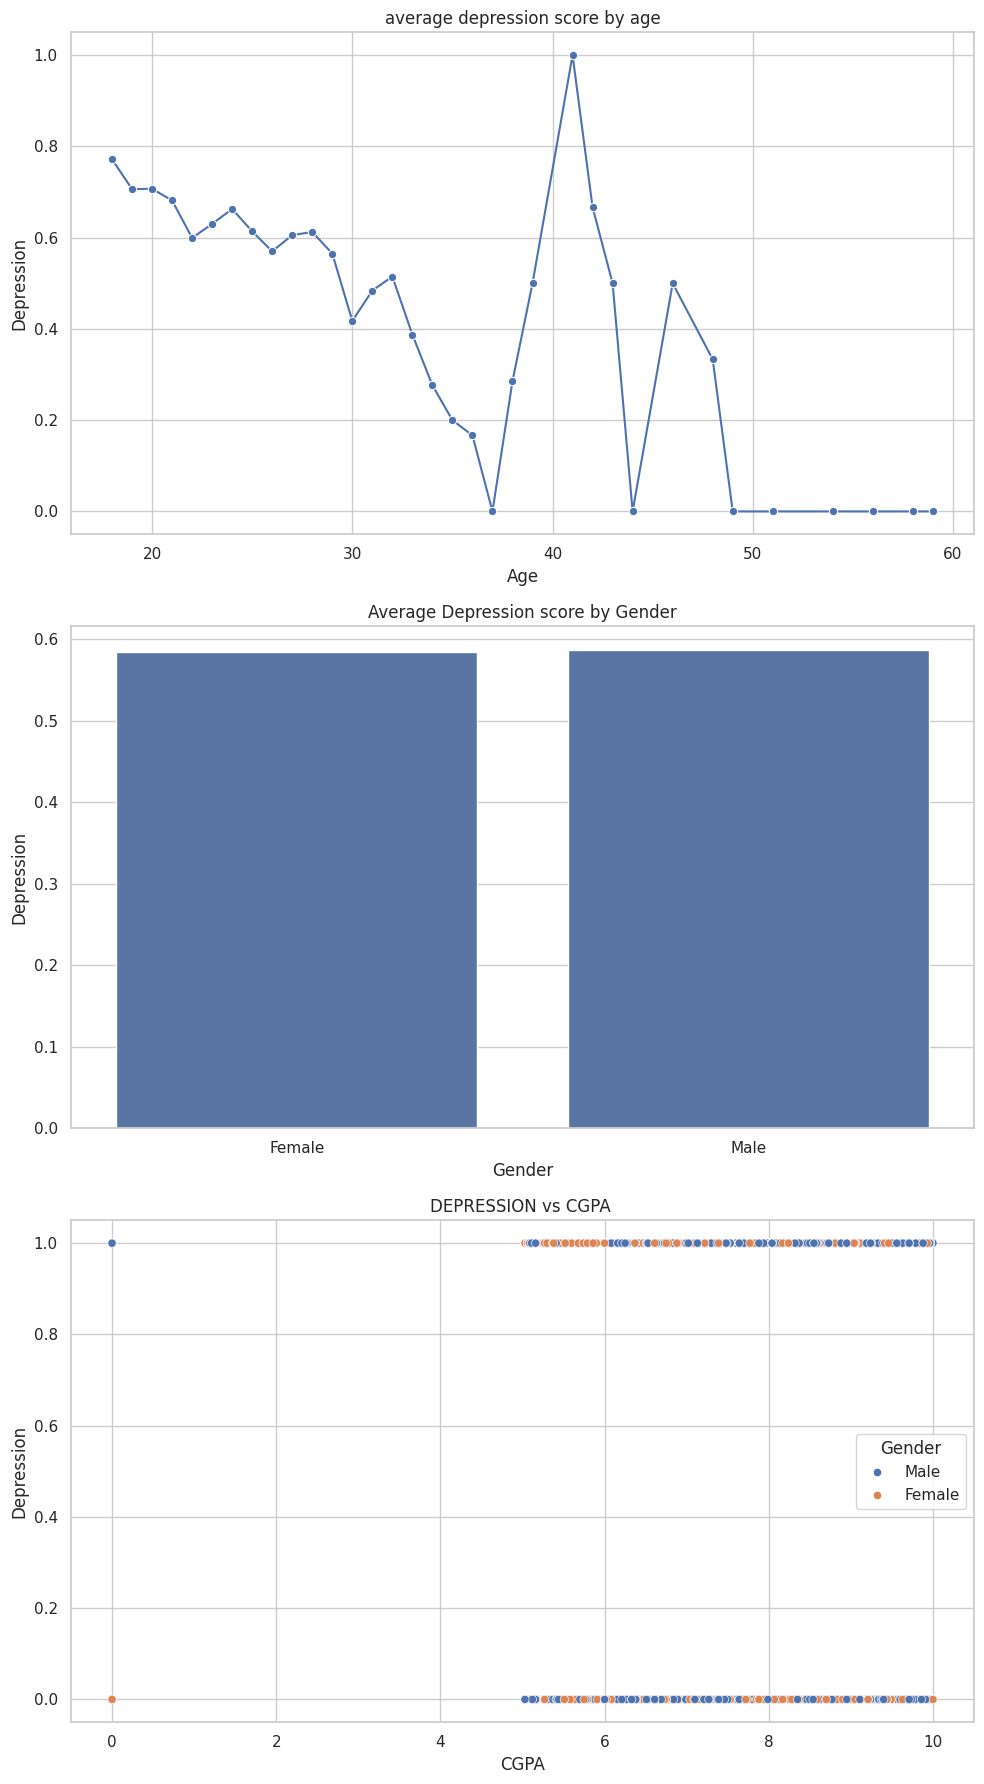

In [ ]:
sns.set(style= "whitegrid") #Set seaborn theme
age_depression= df.groupby("Age")["Depression"].mean().reset_index() # Group by Age
gender_depression=df.groupby("Gender")["Depression"].mean().reset_index() # Group by Gender
fig,axs = plt.subplots(3,1,figsize=(10,18)) # Create plots
# Plot 1: Age vs Depression
sns.lineplot(data=age_depression,x='Age',y='Depression',marker='o',ax=axs[0])
axs[0].set_title('average depression score by age')
# Plot 2: Gender vs Depression
sns.barplot(data=gender_depression,x='Gender',y='Depression',ax=axs[1])
axs[1].set_title('Average Depression score by Gender')
# Plot 3: CGPA vs Depression (Scatter)
sns.scatterplot(data=df,x='CGPA',y='Depression',hue='Gender',ax=axs[2])
axs[2].set_title('DEPRESSION vs CGPA ')
plt.tight_layout()
plt.show()

VISUALIZATION
BAR CHART - AVERAGE DEPRESSION BY GENDER

<ipython-input-33-cc434912a201>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_avg,x='Gender',y='Depression',palette='Set2')


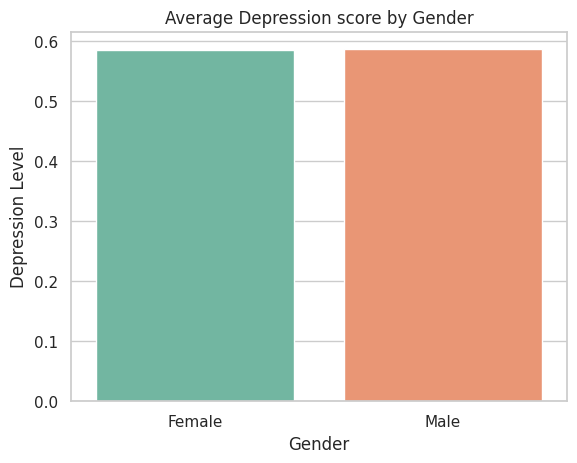

In [ ]:
gender_avg=df.groupby('Gender')['Depression'].mean().reset_index()
sns.barplot(data=gender_avg,x='Gender',y='Depression',palette='Set2')
plt.title('Average Depression score by Gender')
plt.xlabel('Gender')
plt.ylabel('Depression Level')
plt.show()

AVERAGE DEPRESSION BY FINANCIAL STRESS LEVEL

<ipython-input-34-e79e69cb319d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stress_avg,x='Financial Stress',y='Depression',palette='coolwarm')


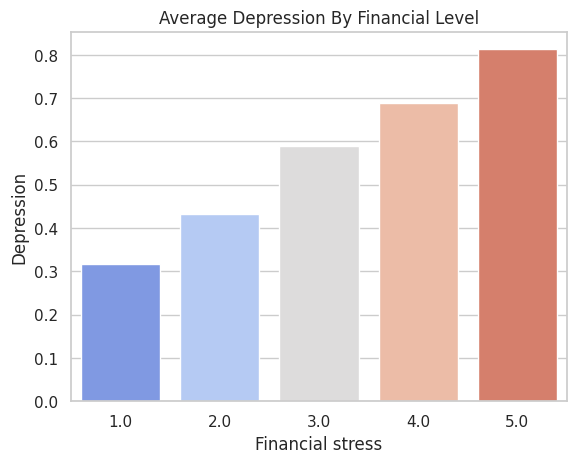

In [ ]:
stress_avg=df.groupby('Financial Stress')['Depression'].mean().reset_index()
sns.barplot(data=stress_avg,x='Financial Stress',y='Depression',palette='coolwarm')
plt.title('Average Depression By Financial Level')
plt.xlabel('Financial stress')
plt.ylabel('Depression')
plt.show()


AVERAGE DEPRESSION BY City Level

<ipython-input-35-2f48f7287e50>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_depression,x='City',y='Depression',palette='viridis')


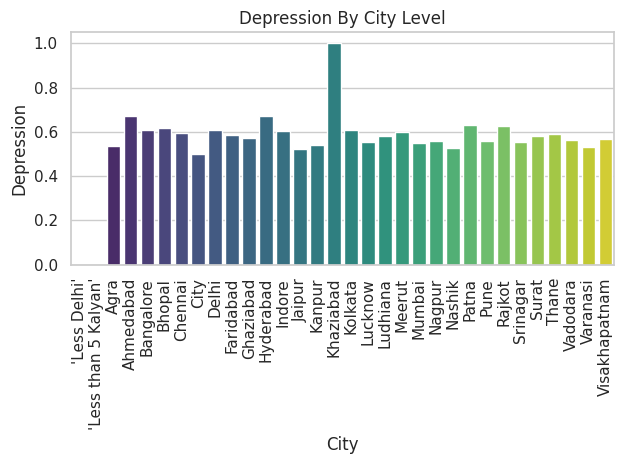

In [ ]:
city_depression=df.groupby('City')['Depression'].mean().reset_index()
sns.barplot(data=city_depression,x='City',y='Depression',palette='viridis')
plt.title('Depression By City Level')
plt.xlabel('City')
plt.ylabel('Depression')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Average Depression By Degree Level

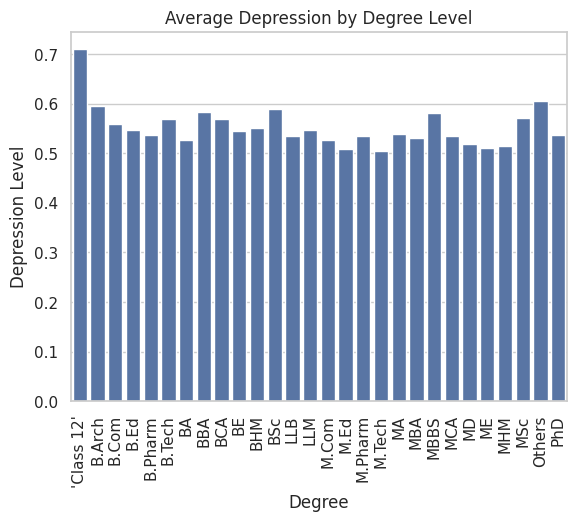

In [ ]:
Degree_depression=df.groupby('Degree')['Depression'].mean().reset_index()
sns.barplot(data=Degree_depression,x='Degree',y='Depression')
plt.title('Average Depression by Degree Level')
plt.xlabel('Degree')
plt.ylabel('Depression Level')
plt.xticks(rotation=90)
plt.show()

Depression by Sleep suration Level

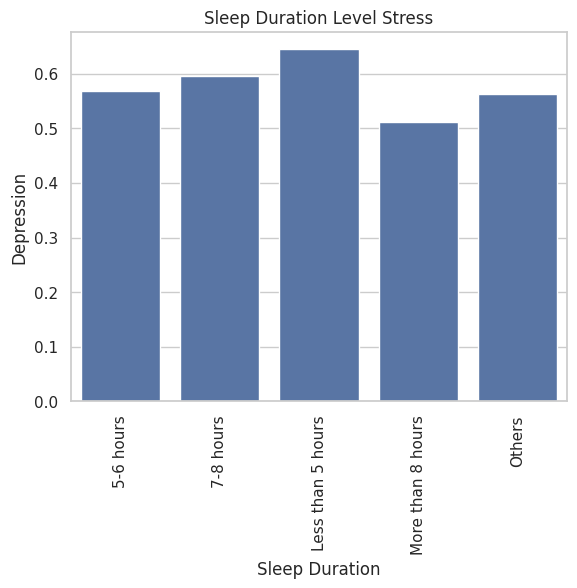

In [ ]:
sleepduration_depression=df.groupby('Sleep Duration')['Depression'].mean().reset_index()
sns.barplot(data=sleepduration_depression,x='Sleep Duration',y='Depression')
plt.title('Sleep Duration Level Stress')
plt.xlabel('Sleep Duration')
plt.ylabel('Depression')
plt.xticks( rotation=90)
plt.show()

Dietry Habits Average according to sleep duration

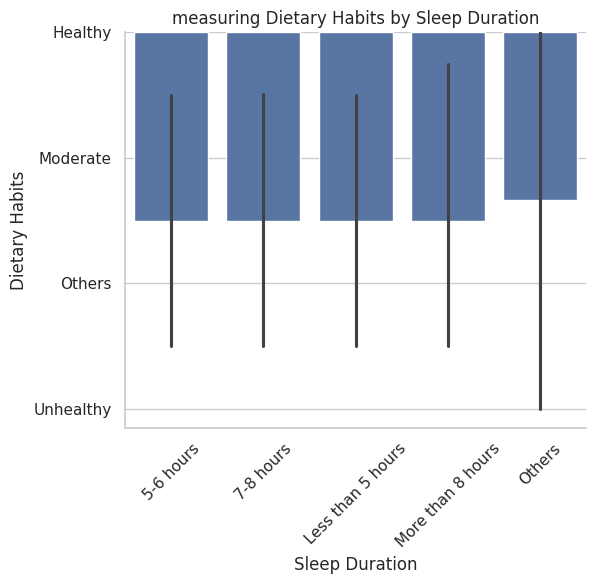

In [ ]:
diet_count = df.groupby(['Sleep Duration', 'Dietary Habits']).size().reset_index(name='Count')
sns.catplot(data=diet_count,x='Sleep Duration',y='Dietary Habits',kind='bar', height=6)
plt.title('measuring Dietary Habits by Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Dietary Habits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()